Experiments are performed at different conditions, using different chemistry magmas. Consequently, depending upon type of eruption you want to understand, some experiments could be more useful than others.

Here, we first look at the range of pressures that the experiments are performed, and explore the data using by transforming the data to a logarithmic scale.

In [1]:
df <- read.table("CPX_experiments.txt",sep="\t",header=TRUE)
df[is.na(df)]<-0

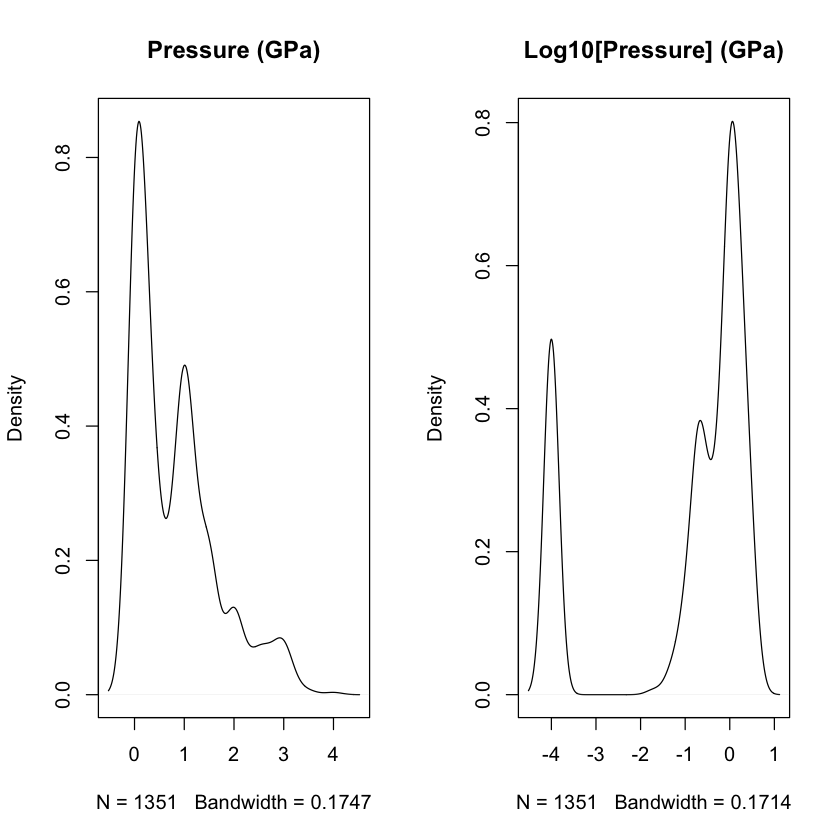

In [2]:
Y <- df$P_GPa
ylab <- "Pressure (GPa)"

par(mfrow=c(1,2))
plot(density(Y,na.rm=TRUE),main=ylab)
plot(density(log10(Y),na.rm=TRUE),main="Log10[Pressure] (GPa)")


We can see that the plot of Log<sub>10</sub>(Pressure) that there are actually two normal distributions in the data.

QUESTION: WHY DO THESE TWO LOG-NORMAL DISTRIBUTIONS EXIST?

QUESTION: WHAT IS A PHYSICAL REASON WHY IT MIGHT BE BETTER USING THE LOGARITHM OF PRESSURE?

QUESTION: WHAT ELEMENTS BEHAVE DIFFERENTLY FOR THE TWO PRESSURE RANGES?

QUESTION: WHAT ABOUT TEMPERATURE, SHOULD WE MODEL THE LOGARITHM OF TEMPERATURE?

Below we subset the data and fit a regression to experiments with pressures greater than 10<sup>-3</sup> GPa:

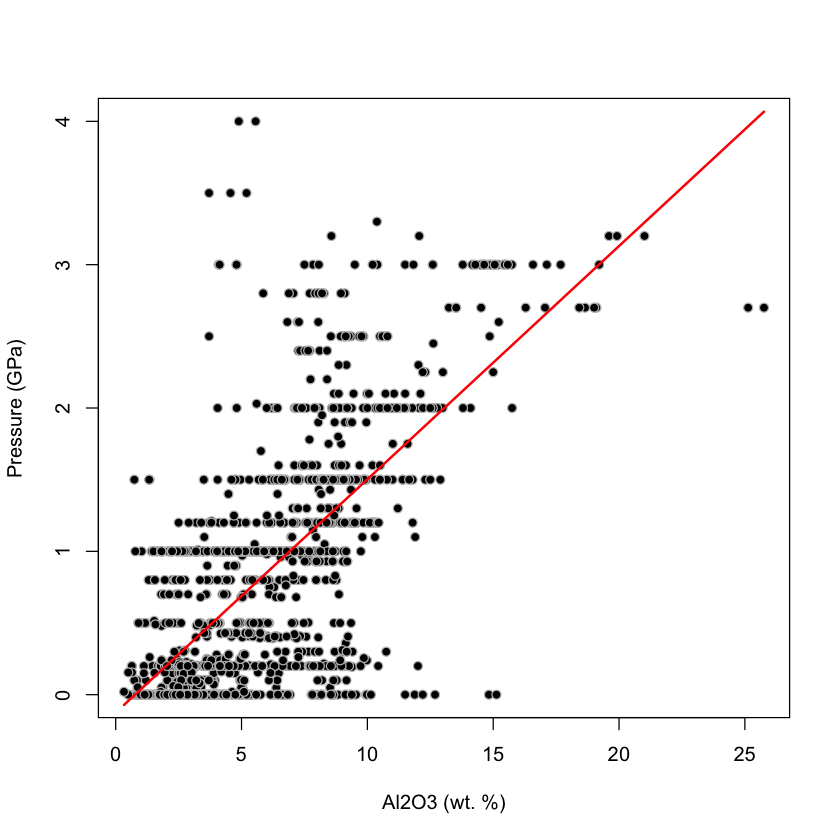

In [3]:
X <- df$Al2O3.cpx
xlab <- "Al2O3 (wt. %)"

model.data <- data.frame(Y,X)

ID <- which(log10(model.data$Y) > -5)
model.data.subset <- model.data[ID,]

linearMod <- lm(Y ~ X, data=model.data.subset)

plot(model.data.subset$X,model.data.subset$Y,pch=21,col="grey",bg="black",xlab=xlab,ylab=ylab)
lines(sort(model.data.subset$X), fitted(linearMod)[order(model.data.subset$X)], col='red', type='l',lwd=2) 

Another reason to subset the experiments could be the magma chemistry. Below, you can plot the chemistry of the experiments

Be-aware, that now we plot the liquid (".liq") compostion, not the clinopyroxene (".cpx") composition.

You can add multiple oxides in one X or Y variable, and remember to change the axes labels.

QUESTION: DO YOU SEE ANY CLUSTERS IN THE CHEMISTRY OF THE EXPERIMENTS?

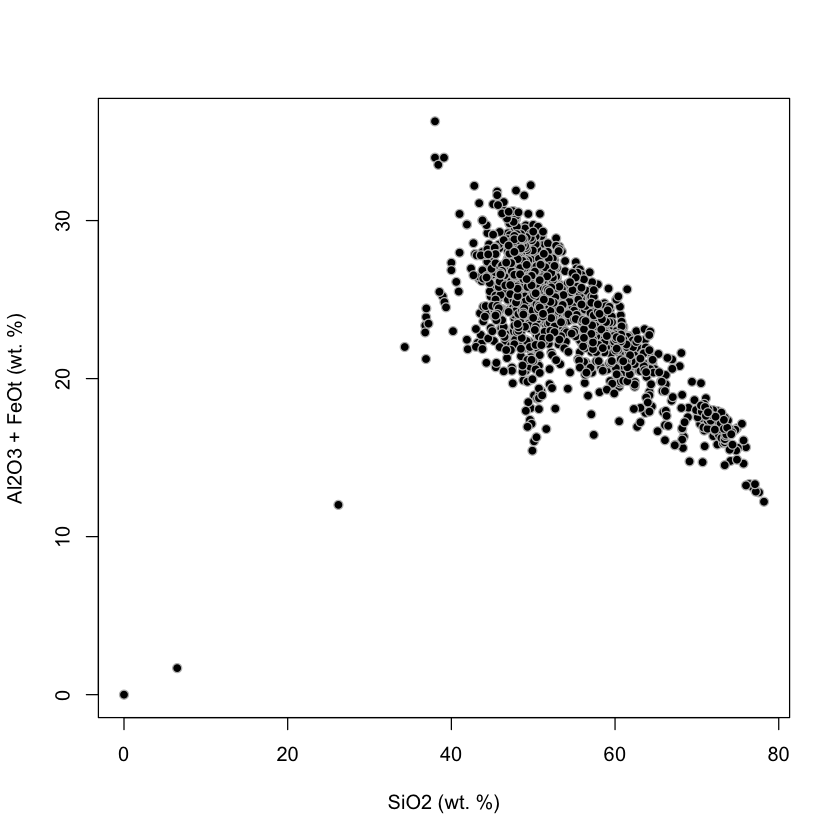

In [5]:
Y <- df$Al2O3.liq + df$FeOt.liq 
X <- df$SiO2.liq
ylab <- "Al2O3 + FeOt (wt. %)"
xlab <- "SiO2 (wt. %)"

plot(X,Y,pch=21,col="grey",bg="black",xlab=xlab,ylab=ylab)